# Final Project - Time Series Forecasting

In this project we focused on long term time series forecasting and tried to find what is the best way to deal with this kind of problem, using both more modern and recent methods and more classical methods. More specifically, we wanted to investigate how well Transformers (and different variants) were able to solve this kind of problem, comparing their performance with that achieved by more classic and less modern models. To do this, we followed as a guide two very recent papers on time series:    
- "Are Transformers Effective for Time Series Forecasting?" (https://arxiv.org/abs/2205.13504, 26/05/2022), Ailing Zeng, Muxi Chen, Lei Zhang, Qiang Xu;    
- "Frequency-domain MLPs are More Effective Learners in Time Series Forecasting" (https://arxiv.org/abs/2311.06184, 10/11/2023), Kun Yi, Qi Zhang, Wei Fan, Shoujin Wang, Pengyang Wang, Hui He, Defu Lian, Ning An, Longbing Cao, Zhendong Niu;   

# Problem Statement

We are dealing with a multivariate time series forecasting problem. In particular, let $X = [X_1, ..., X_T] \in \mathbb{R}^{N \times T}$ represent our regularly sampled multivariate time series, where:
- $N$ is the number of distinct time series (variables)
- $T$ is the total number of timestamps
- $X_t \in \mathbb{R}^N$ denotes the values of all $N$ series at time $t$

Our models will work using a lookback window of length $L$. This emans that at time $t$ the input matrix can be represented as $X_t = [X_{t-L+1}, ..., X_t] \in \mathbb{R}^{N \times L}$.

We aim to forecast the next $\tau$ timestamps for all $N$ series, where the prediction target is defined as $Y_t = [X_{t+1}, ..., X_{t+\tau}] \in \mathbb{R}^{N \times \tau}$. $\tau$ represents the forecasting horizon, and in our project it will assume values in the set $\{96, 132, 336, 720\}$ as in the references articles.  


### Forecasting Strategy

The sliding window approach allows the model to capture temporal dependencies and patterns within the recent past. Indeed, our strategy is to leverage historical observations $X_t$ to predict future values $\hat{Y_t}$. We can formulate this as a function approximation problem:

$\hat{Y_t} = f_\theta(X_t)$

where:
- $f_\theta(\cdot)$ represents our forecasting model
- $\theta$ denotes the learnable parameters of the model

Fir each model, we will look towards minimizing the discrepancy between our predictions $\hat{Y_t}$ and the actual future values $Y_t$ under the Mean Absolute Error and Root Mean Squared Errors losses.


## Possible Approaches

Statistical approaches -> ARIMA, VAR, exponential smoothing, Prophet -> parametric solutions ->  domain expertise

Machine learning approaches -> XGboost, GBRT -> manual feature engineering and model design

Deep Learning -> MLP, CNN, RNN, GRU, LSTM

Transformers -> Informer, Autoformer, PatchTST


## ARIMA

ARIMA (AutoRegressive Integrated Moving Average) is a widely used statistical method for time series forecasting. It predicts future points by analyzing past values, forecast errors, and using differencing to make the series stationary. It is particularly useful for time series that exhibit trends or seasonal patterns and are not inherently stationary. It explains a time series based on its own past values.   
It is made of 3 components: AutoRegressive (AR), Integrated (I) and Moving Average (MA).

The **AR** part uses past values of the time series to predict future values, the number of lag observations.
The **I** part involves differencing the time series to make it stationary, indicating the number of differencing steps.
The **MA** part models the error term as a combination of past forecast errors, indicating the number of lagged forecast errors.


## Prophet

Prophet is an open-source forecasting tool developed by Meta (f.k.a. Facebook) aimed at producing high-quality forecasts for time series data. It is designed to handle various types of time series data, including daily, weekly, and yearly patterns, by decomposing the time series into three main components: *trend*, *seasonality*, and *holidays*. Prophet is particularly well-suited for time series data that exhibits strong seasonal effects and has several seasons of historical data. The main features provided by Prophet are:   

**Automatic Seasonality**: Prophet automatically detects and models daily, weekly, and yearly seasonality.
**Holiday Effects**: Users can specify custom holidays and special events that might affect the forecasts.
**Missing Data Handlin**g: Prophet can handle missing data and outliers in the time series.
**Flexible Modeling**: Users can incorporate custom seasonalities and other factors.
**Uncertainty Intervals**: It provides uncertainty intervals to quantify the confidence in the forecasts.

## Gradient Boosting

Gradient Boosting is machine learning technique used for both regression and classification problems. It belongs to the family of ensemble methods, which combine the predictions of multiple base estimators to produce a single robust model. The main idea behind gradient boosting is to build models sequentially, where each new model attempts to correct the errors made by the previous models. This is achieved through a process that involves fitting new models to the residuals of the combined ensemble.

Gradient boosting works by iteratively adding base learners (typically shallow decision trees) to an ensemble in a stage-wise manner. Each stage focuses on minimizing the overall prediction error of the ensemble by fitting a new model to the negative gradient of the loss function with respect to the current ensemble's predictions.

As usual The goal is to minimize the loss function
$L(y,F(x))$. For simplicity let's say the loss is the MSE. Then let us consider a gradient boosting algorithm with $𝑀$ stages. At each stage
$𝑚$ where $(1≤𝑚≤𝑀)$ of gradient boosting, we have a model $F_m$. To improve $F-m$, our algorithm must add to it some new estimator $h_m(x)$. Thus,
$$F_{m+1}(x_i) =  F_{m}(x_i) + h_m(x) = y_i$$
which implies
$$h_m(x_i) = y_i - F_m(x_i) $$

Therefore, gradient boosting will fit
$h_m$ to the residual $y_{i}-F_{m}(x_{i})$. As in other boosting variants, each $F_{m+1}$ attempts to correct the errors of its predecessor $F_{m}$.

Gradient Boosting Regression is well-suited for time series regression because of its ability to handle non-linearity, robustness to outliers, flexibility in feature engineering, capability to capture trends and seasonality, alignment with the sequential nature of time series data, ability to model autocorrelation, and regularization techniques to prevent overfitting.


## Transformers

Transformers have been a breakthrough in many areas of machine learning, particularly in natural language processing (NLP). Due to their success, they have also been applied to time series forecasting, garnering significant interest in this field. However, in August 2022, a paper titled *“Are Transformers Effective for Time Series Forecasting?”* was published by researchers from the Chinese University of Hong Kong and the International Digital Academy, questioning the efficacy of transformers in the context of time series forecasting, particularly for long-term predictions.

The main strength of transformers lies in their multi-head self-attention mechanism, which can extract semantic correlations among elements in a long sequence, such as words in a text.

### Self attention

In a transformer's model, the self-attention mechanism allows each token in the input sequence to interact with every other token, understanding their dependencies and relationships.

A self-attention block $sa[\cdot]$ takes $N$ inputs $x_1, …, x_N$ each of dimension $D \times 1$ and returns $N$ output vectors of the same size.
$$sa_n[x_1, ..., x_N] = \sum_{m=1}^N a[x_m, x_n] v_m$$

where

$$
v_m = \beta_v + \Omega_v x_m
$$

 is a value computed for each input as linear combination of input, biases and weights, while $a[x_m, x_n]$ is the attention the $n^{th}$ output pays to the input $x_m$.

 To get the attention weights we compute the *dot-product self-attention :*

$$
a[x_m, x_n] = softmax_m[k_\cdot^T q_n] \\ = \frac{e^{k_m^Tq_n}}{\sum_{m'=1}^N e^{k_{m'}^T q_n}}
$$

where $\{q_n\}$ are the *queries* and $\{k_m\}$ the *keys*, computed as

$$
q_n = \beta_q + \Omega_q x_n \\ k_m = \beta_k + \Omega_k x_m
$$

Thus,

$$
sa_n[x_1, …, x_N] = \sum_{m=1}^N softmax_m[k_{\cdot}^T q_n] v_m
$$

The weights $a[x_{\cdot}, x_n]$ depend on the similarities between the n-th query and all of the keys (dot product as similarity), and the softmax function makes the key vectors “compete” with each other to contribute to the final result.

The above computation can be written in a compact form if the $N$ inputs $x_n$ form the columns of the $D × N$ matrix $X$. The values, queries, and keys can be computed as:

$$
V[X] = β_v 1^T + Ω_v X \\
Q[X] = β_q 1^T + Ω_q X \\
K[X] = β_k 1^T + Ω_k X
$$

The self-attention computation is then:

$$Sa[X] = V[X] · Softmax[K[X]^T Q[X]]$$


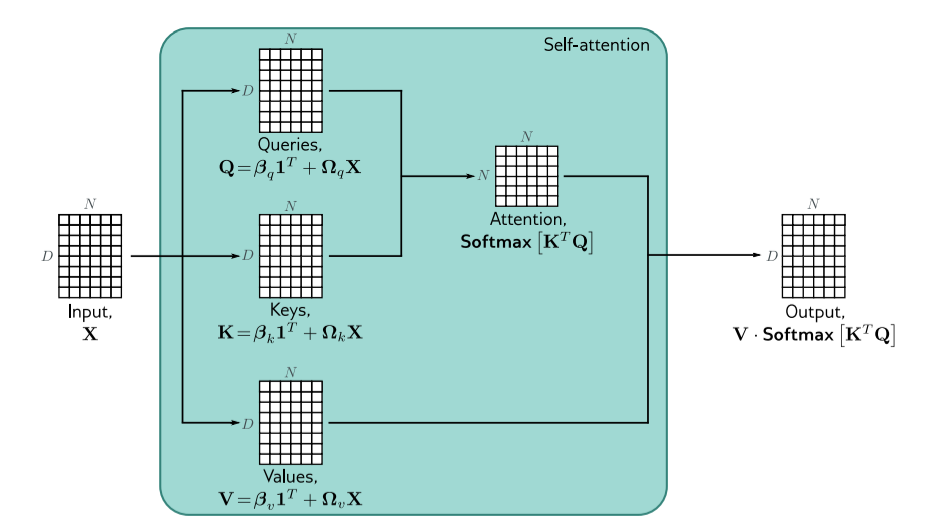

### Positional encoding

 However, self-attention is permutation invariant, meaning it does not inherently preserve the order of the elements, i.e. the computation is the same regardless of the order of the input. More precisely, it is equivariant with respect to input permutations. Thus, positional encodings have been added to preserve some order. One way to do this is with **absolute positional encodings**: A matrix $Π$ is added to the input $X$ that encodes positional information. Each column of $Π$ is unique and hence contains information about the absolute position in the input sequence.


### Transformers layers
Self-attention is just one part of a larger transformer layer. This consists of a multi-head self-attention unit followed by a fully connected network. Both units are residual networks (i.e., their output is added back to the original input). In addition, it is typical to add a LayerNorm operation after both the self-attention and fully connected networks.




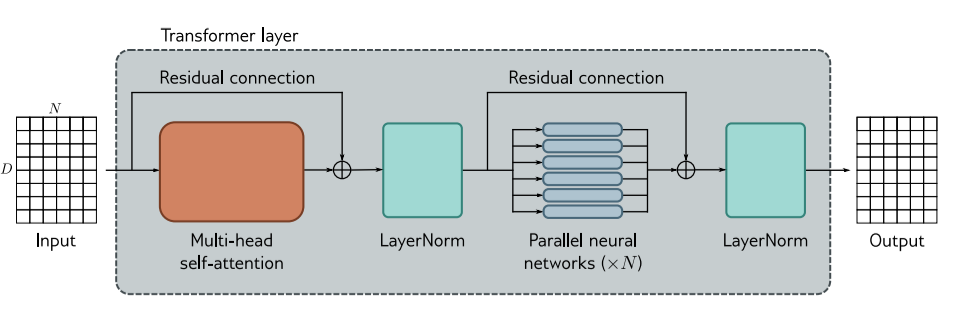

### Transformers for Time Series

Even if positional encoding is applied, some information about the order is still lost. This lack of temporal awareness is not a concern for semantic-rich applications like NLP, where the semantic meaning of a sentence is largely preserved even if some words are reordered.

However, in time series data, which lack semantic richness and where the order of the data points is crucial, this becomes a significant issue. Indeed, time series analysis focuses on modeling temporal changes among a continuous set of points, making the order itself the most critical aspect. Time series data is fundamentally sequential, and the order of the points carries significant meaning. Each data point is intrinsically linked to its position in time. Therefore, the permutation invariance property of the self-attention mechanism, which treats the sequence as a set and ignores the order of elements, leads to a loss of temporal information. Experiments confirm that Transformer-based methods suffer from this issue more than LTSF-Linear models, which handle sequence order better and avoid overfitting.

The premise of Transformer models is the semantic correlations between paired elements, but in time series, the temporal relationships play the most crucial role rather than the paired relationships. Although transformers attempt to preserve some ordering information using positional encoding and embedding sub-series, this is often insufficient. To demonstrate this, the authors of the paper shuffled the data of some time series randomly and then attempted to predict new values. The performance of a time series model should significantly drop with scrambled data, as it cannot learn from the disordered series. However, the transformers' performance remained largely unaffected, indicating that they were not learning the temporal relationships between data points.


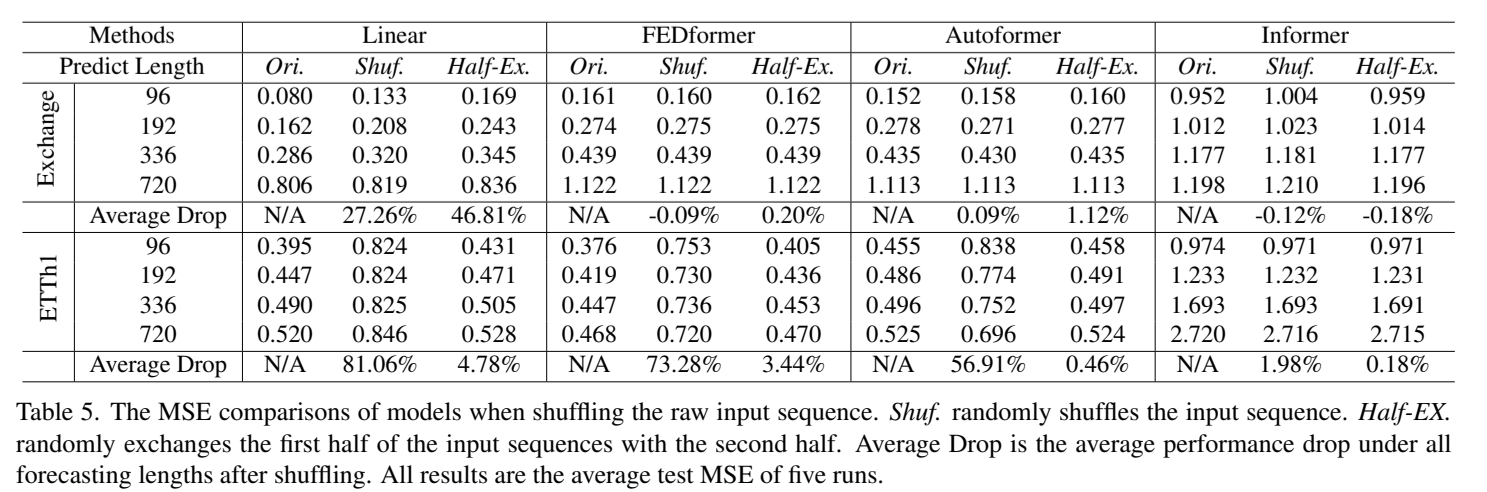



Additionally, transformers are computationally expensive and require large amounts of data to train effectively. This is not a problem for NLP tasks, where large datasets are available, but it poses a challenge for time series forecasting, where data is often scarce. Vanilla Transformers have $O(L^2)$ complexity for self-attention and produce decoder outputs in an autoregressive manner, resulting in slow inference speed and error accumulation.



## LTSF-Linear

Thus the autors introduced a very simple architecture, a DMS (Direct Multi Step forecasting) model, that, using a weighted sum operation, directly regresses past time series for future prediction. In mathematical terms:

$$\bar{X_i}  = W \cdot X_i$$

where
$W \in R^{T x L}$ is a linear layer along the temporal axis and
$X_i$ is th input fot the i-th variate

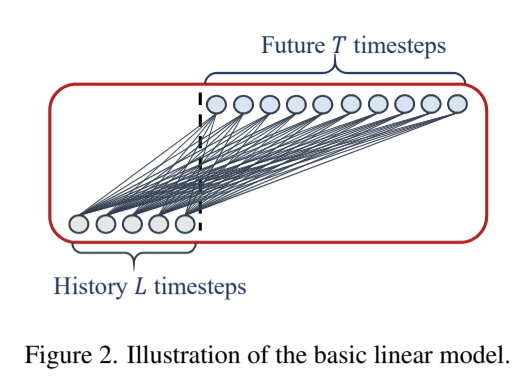

The authors also futher introduce two variants with two preprocessing methods, named DLinear and NLinear.

***DLinear*** --> decomposition of data into trend and seasonal (remainder) components. Then, two one-layer linear layers are applied to each component, and we sum up the two features to get the final prediction components

***NLinear*** --> first subtracts the input by the last value of the sequence. Then, the input goes through a linear layer, and the subtracted part is added back before making the final prediction

With these two models the authors obtain performances that are often superior to those of trasnformers based models.

**Efficiency**: As LTSF-Linear is a linear model with two linear layers at most, it costs much lower memory and fewer parameters and has a faster inference speed than existing Transformers. Indeed, the gap is very significant.


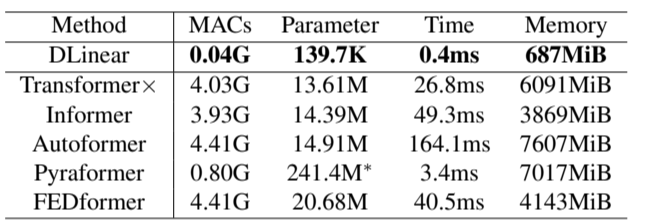

**Interpretability**: After training, we can visualize weights from the seasonality and trend branches to have some insights on the predicted values.

Indeed, the weight visualization of LTSF-Linear can also reveal certain characteristics in the data used for forecasting. We take DLinear as an example and we visualize the trend and remainder weights for the Traffic data.

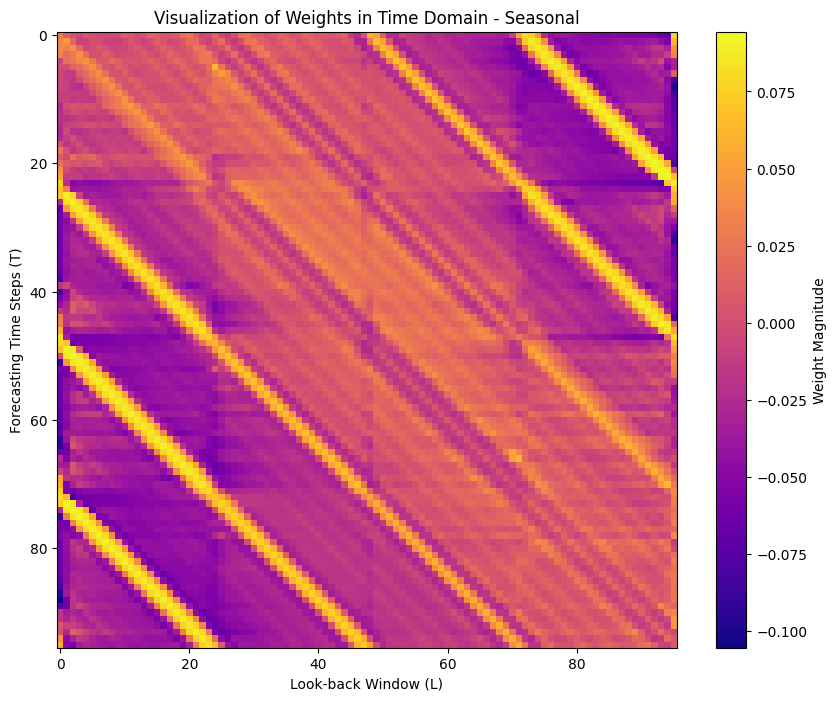

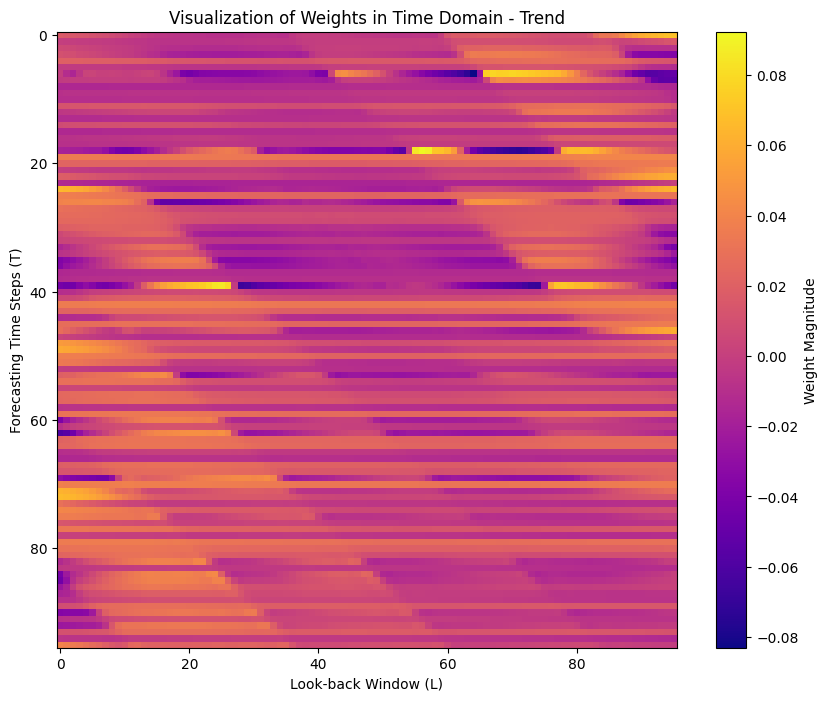

This plot shows there is a periodicty in the data, as the model gives high weights to the latest time step of the look-back window for the 0,23,47,.. forecasting steps with 24 steps being a day as we have hourly data.

### More Analyses on LTSF-Transformers

**Can existing LTSF-Transformers extract temporal relations well from longer input sequences?**

Existing Long-Term Series Forecasting (LTSF) Transformers face challenges with extracting temporal relationships from long input sequences.

The size of the look-back window should greatly impact forecasting accuracy as
it determines how much we can learn from historical data. Generally speaking, a good TSF model should be able to achieve better results with larger look-back window sizes. To study the impact of input look-back window sizes, we conduct experiments with $L \in \{48, 96, 192\}$.

Below we report the **MAE** of different models for varying lookback window sizes in long term forecasting $(T=96)$ on th exchange rate dataset:

| L   | DLinear  | NLinear  | Informer  | Autoformer  | PatchTST  | Vanilla Trans  |
|-----|----------|----------|-----------|-------------|-----------|----------------|
| 24  | 0.4336   | 0.0952   | 0.1797    | 0.0650      | 0.0347    | 0.1911         |
| 48  | 0.3589   | 0.0739   | 0.1919    | 0.0601      | 0.0348    | 0.1902         |
| 96  | 0.1739   | 0.0599   | 0.1551    | 0.0653      | 0.0348    | 0.1501         |
| 192 | 0.0688   | 0.0471   | N/A       | N/A         | 0.0352    | N/A            |




What we notice is that the window size doesn't seem to inlfuence much the performance of Transformer models, as suggested by the paper. Autoformer and PatchTST seem completely unaltered, Vanilla Transformer slightly improves, while Informer first gets worse and then improves.

On the other hand, LTSF-Linear models show a clear improvement as the window size gets bigger.

Thus, this suggests that existing transformers solutions tend to overfit temporal noises instead of extracting temporal information if given a longer sequence.


For long-term forecasting, understanding trends and periodicities is more crucial than the look-back window size. Simplifying Transformer models, such as replacing self-attention layers with linear layers, has been shown to enhance performance, indicating that complex designs may not be necessary for LTSF.

Embedding strategies also play a significant role. Without positional embeddings, the performance of Transformers like Informer declines. However, models such as FEDformer and Autoformer, which incorporate timestamp sequences for embedding, can perform better without fixed positional embeddings.

Finally, concerns about training data size affecting performance might be overstated. Using less data sometimes results in lower prediction errors, suggesting that data size may not be as critical as thought. Additionally, practical tests reveal that many Transformer variants perform similarly or worse in terms of inference time and memory usage compared to the vanilla Transformer.

In the end, we can say that Transformers models for long term forecasts may not be as effective in handling long sequences and preserving temporal order as previously believed, and simpler models or alternative approaches may offer better performance.


## Frequency-domain MLPs are More Effective Learners

In a paper titled "*Frequency-domain MLPs are More Effective
Learners in Time Series Forecasting*" presented at NeurIPS 2023, the authors propose a novel architecture that ouperforms both LTSF-Linear models and Transformers (even PatchTST, one the most recent transformer architecture based on two key components: 1. segmentation of time series into subseries-level patches which are given as input tokens to the Transformer; 2. channel-independence where each channel contains a single univariate time series that shares the same embedding and Transformer weights across all the series. This model came out ans an answer to the LTSF-Linear family, and was able to ouperform it).

The authors suggest to apply MLPs in the frequency domain for time series forecasting as this has two advatages:
* **global view**: frequency-domain MLPs can capture a more complete view of signals, since they operate on spectral components acquired from series transformation. This makes it easier to learn global spatial/temporal dependencies.
* **energy compaction**: frequency-domain MLPs concentrate on the smaller key part of frequency components with the compact signal energy, and thus can preserve clearer patterns while filtering out noises.

To test the first hypothesis, we applied (as the authors of the paper did), an MLP in both time and frequency domain, using the Traffic dataset as the input data, a lookback window of 96 and a forecast horizon of 96. We plot the weights these models learned in the two different cases. In particular, for the visualization of the weights learned on the frequency spectrum, we first transform the input into the frequency domain and select the real part of the input frequency spectrum to replace the original input and then we pass it to the model and plot the weights.

### Visaulization of Weights - Time Domain

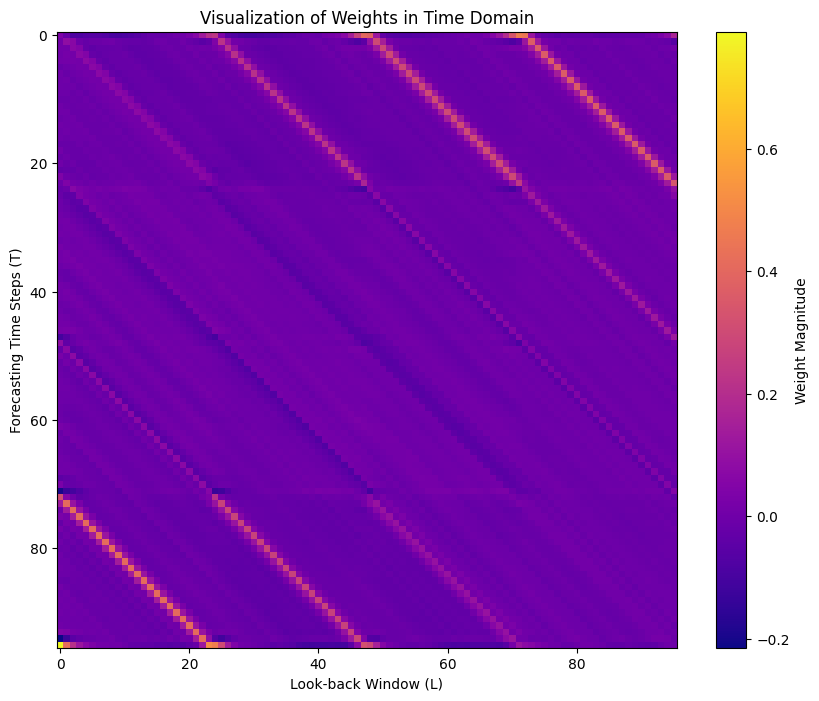



### Visualization of Weights - Frequency Domain

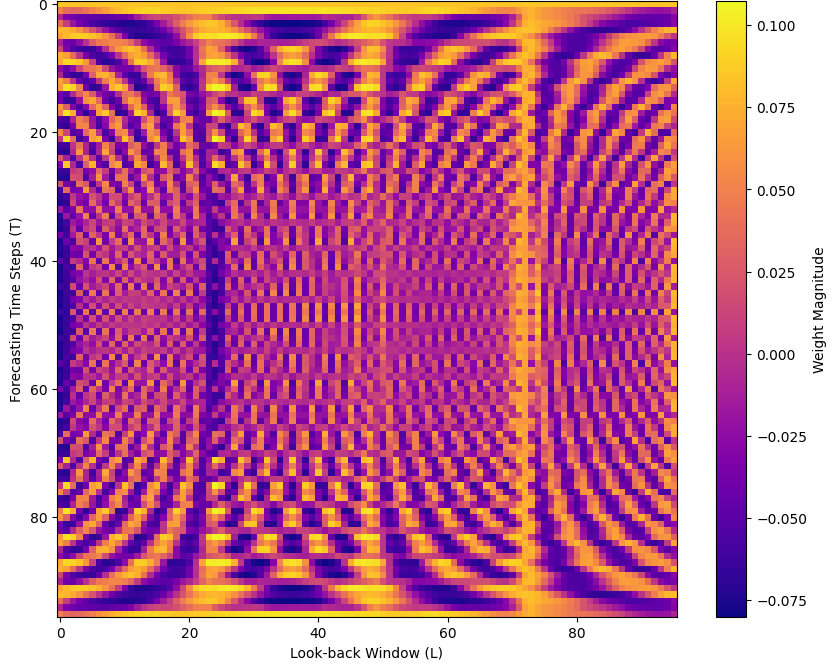

It is experimentally clear that the patterns learned in the frequency domain exhibit more obvious global periodic patterns than those learned in the time domain.

Next, to test the energy compaction hypothesis, we plot get the real and imaginary parts of the real part of the weights of the FreMLP architecture learned in the time and in the frequency domain.

### Real Weights - Time Domain

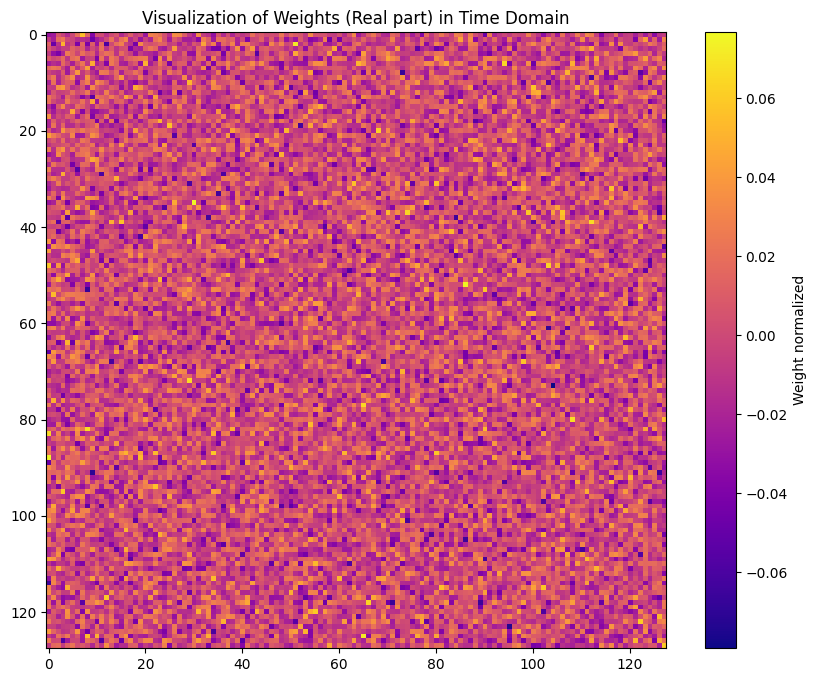

### Real and Imaginary Weights - Frequency Domain

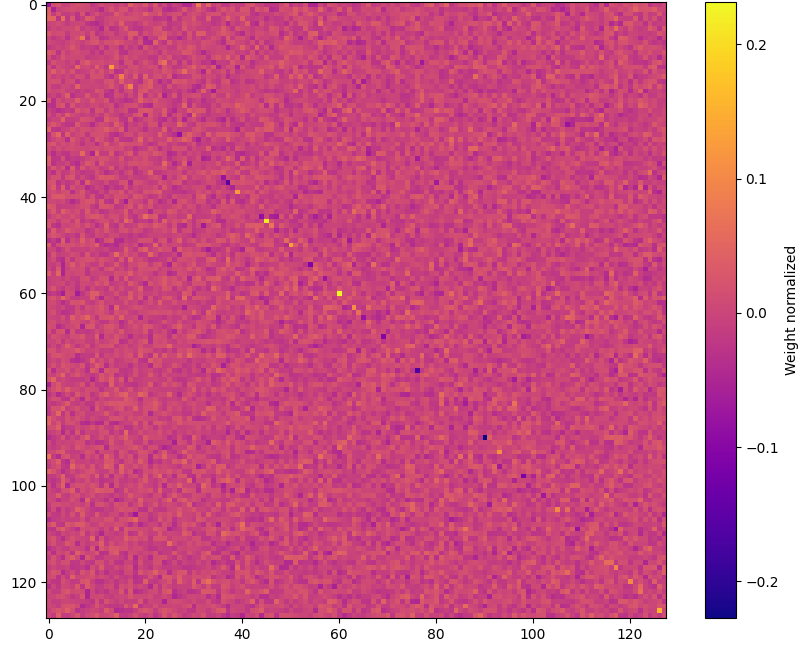

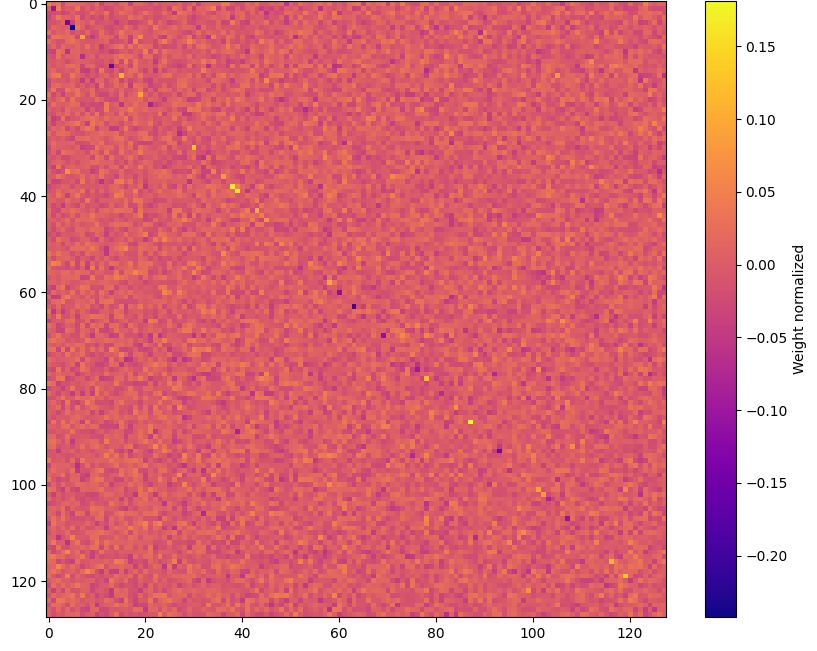

We notice that a diagonal pattern is emerging in the frequency domain. Indeed, the weight coefficients exhibit energy aggregation characteristics (the diagonal patterns) which can facilitate to learn the significant features.

### Frequency Learning Architecture

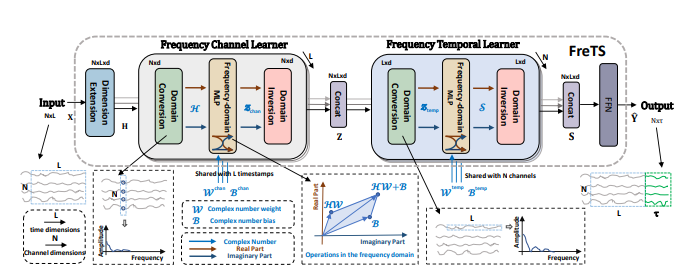

First of all, inspired by word embeddings, to bring more semantic information, the input lookback window $X_t ∈ R^{N×L}$ is multiplied with a learnable weight vector $ϕ_d ∈ R^{1×d}$ to obtain a more expressive hidden representation $H_t ∈ R^{N×L×d}$. Thus we get $H_t = X_t × ϕ_d$.

Then the input **$H$** is converted into the frequency domain applying the Fourier Transform:

$$H_f(f) = ∫_{-∞}^{∞} H(v) e ^{-j2 \pi f v} dv$$

where $f$ is the frequency variable, $v$ the integral variable and $j$ the imaginary unit. We will call this equation `DomainConversion`. When we complete the learning in the frequency domain, we can then convert $H_f$ back to the time domain using the inverse conversion formula:

$$H(v) = ∫_{-∞}^{∞} H_f(f) e ^{j2 \pi f v} df$$

we will call this the `DomainInversion`.

### Frequency Channel Learner

Next we want to consider channel dependencies for time series forecasting, as it allows the model to capture interactions and correlations between different variables, leading to more accurate predictions.
This is done by the Freqeuncy Channel Learner, which operates on each timestamp by sharing the same weights between the $L$ timestamps to learn the channel dependencies. In other words, let's consider, for example, a dataset with multiple weather parameters recorded over time, such as temperature, humidity, wind speed, and pressure. Each of these parameters is a channel in the dataset. The frequency channel learner would take the time series data for these parameters and learn how they interact with each other, enabling the model to make more accurate weather forecasts.

More precisely, the FCL receives as input $H_t \in R^{N \times L \times d}$. Then, given the l-th timestamp $H_t^{:, (l)} \in R{N \times d}$, it does the follwing operations:
$$H_{f-chan}^{:, (l)} = DomainConversion_{chan}(H_t^{:, (l)})$$
$$Z_{f-chan}^{:, (l)} = FreMLP(H_{f-chan}^{:, (l)}, W^{chan}, B^{chan})$$
$$Z^{:, (l)} = DomainInversion_{chan}(Z_{chan}^{:, (l)})$$


### Frequency Temporal Learner
This layer is designed to understand temporal patterns within the frequency domain. It operates using frequency-domain MLPs applied individually to each channel, with shared weights across N channels. More precisely, it utilizes the output from the frequency channel learner: $Z_t \in R^{N \times L \times d}$ as input for the n-th channel $Z_t^{(n),:} \in R^{N \times L \times d}$. We apply the frequency temporal learner with following operations:

$$Z_{f-temp}^{(n),:} = DomainConversion_{temp}(Z_t^{(n),:})$$
$$S_{f-temp}^{(n),:} = FreMLP(Z_{f-temp}^{(n),:}, W^{temp}, B^{temp})$$
$$S^{(n),:} = DomainInversion_{temp}(S_{f-temp}^{(n),:})$$

### Projection

Finally the learned channel and temporal dependencies are used to make predictions for the future $\tau$ timestamps $\hat{Y_t} \in R^{N \times \tau}$ by a 2-layered feed forward network (FFN) with one forward step that can avoid error accumulation.
$$\hat{Y_t} = \sigma(S_t\phi_1 + b_1)\phi_2 +b_2$$


### Frequency-domain MLPs

To capture the main time series patterns effectively making use of the global view and energy compaction properties, the authors introduce the frequency-domain MLP architecture mentioned in the steps before.

#### Definition 1
For a complex input $H_f \in \mathbb{C}^{m \times d}$, given a complex weight matrix $W \in \mathbb{C}^{d \times d}$ and a complex bias $B \in \mathbb{C}^{d}$, the frequency-domain MLPs can be defined as:

$$
Y_{\ell} = \sigma(Y_{\ell-1}W_{\ell} + B_{\ell})
$$
$$
Y_0 = H_f
$$

where $Y_{\ell} \in \mathbb{C}^{m \times d}$ is the final output, $\ell$ denotes the $\ell$-th layer, and $\sigma$ is the activation function.

Since both $H$ and $W$ are complex numbers, according to the rules of complex number multiplication, it is possible extend the previous equation to:

$$
Y_{\ell} = \sigma(\text{Re}(Y_{\ell-1})W_{\ell}^r - \text{Im}(Y_{\ell-1})W_{\ell}^i + B_{\ell}^r) + j\sigma(\text{Re}(Y_{\ell-1})W_{\ell}^i + \text{Im}(Y_{\ell-1})W_{\ell}^r + B_{\ell}^i)
$$

where $W_{\ell} = W_{\ell}^r + jW_{\ell}^i$ and $B_{\ell} = B_{\ell}^r + jB_{\ell}^i$. Thus, the MLPs in the frequency domain (FreMLP) are implemented by separately computing the real and imaginary parts of the frequency components and then combining them to form a complex number for the final result.

#### Theorem 1
Suppose $H$ is the representation of raw time series and $H_f$ is the corresponding frequency components of the spectrum. The energy of a time series in the time domain is equal to the energy of its representation in the frequency domain. Formally, this can be expressed as:

$$
\int_{-\infty}^{\infty} |H(v)|^2 dv = \int_{-\infty}^{\infty} |H_f(f)|^2 df
$$

where $H_f(f) = \int_{-\infty}^{\infty} H(v) e^{-j2\pi f v} dv$, $v$ is the time/channel dimension, and $f$ is the frequency dimension.

This theorem implies that if most of the energy of a time series is concentrated in a small number of frequency components, the time series can be accurately represented using only those components. Discarding others would not significantly affect the signal's energy. In the frequency domain, the energy concentrates on fewer frequency components, facilitating clearer pattern preservation.

#### Theorem 2
Given the time series input $H$ and its corresponding frequency domain conversion $H_f$, the operations of frequency-domain MLP on $H_f$ can be represented as global convolutions on $H$ in the time domain. This can be formulated as:

$$
H_fW_f + B_f = F(H * W + B)
$$

where $*$ is a circular convolution, $W_f$ and $B_f$ are the complex number weight and bias, $W$ and $B$ are the weight and bias in the time domain, and $F$ is the Discrete Fourier Transform.

These theorem demonstrate that operations in the frequency domain can be viewed as global convolutions in the time domain.


### Model Analysis

####Frequency Channel and Temporal Learners
The authors analyze the effects of frequency channel and temporal learners in both short-term and long-term experimental settings. They consider two variants:
* FreCL --> in which they remove the frequency temporal learner from FreTS
* FreTL --> in which they remove the frequency channel learner from FreTS

What they observed is that the frequency channel learner plays a more important role in short-term forecasting, while in long-term forecasting the frequency temporal learner is more effective than the frequency channel learner.
(This is done in code by keeping the channel_independence parameter = 0 (channel independent) and 1 (channel dependent)).

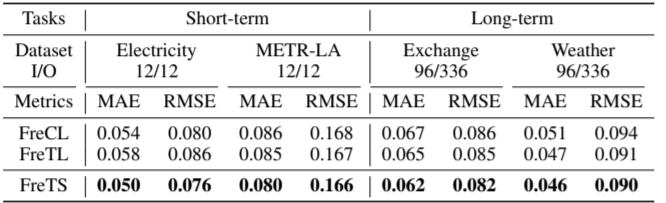

### Efficiency analysis
The authors suggest the complexity of their proposed FreTS is $O(N\log N + L\log L)$. While theoretically some trasnformer architectures bring down the complexity from $O(L^2)$ of the Vanilla Transformer to $O(L)$ e.g. the FEDFormer, in practice it is not clear if the actual inference and memory costs are improved. Moreover, they compare the performance of theur method with transformers and show that compared with Transformer-based methods (FEDformer, Autoformer, and Informer), FreTS reduces the number of parameters by at least 3 times.Moreover, the training time of FreTS is averagely 3 times faster than Informer, 5 times faster than Autoformer, and more than 10 times faster than FEDformer.

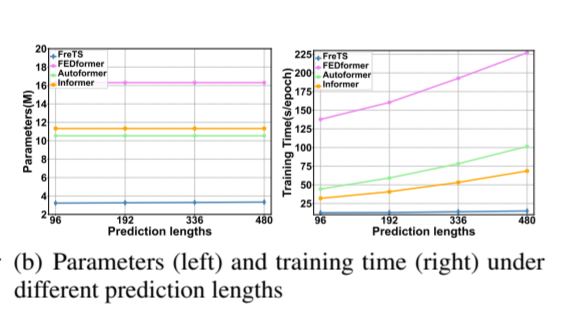

## Quantitative Results

We applied FreTS, GBR, ARIMA, Prophet and LTSF-Linear to all the benchamrk datasets, with a fixed lookback window of $96$ and vatying the forecast horizon. We applied cross-validation for all models (except Prophet for computational reasons). We also added a simple baseline model that repeats the last value in the lookback window. We were not able to extensively train te trasnformers on all datasets because they required higher hardware specifications that we did not have (however we also trained some transformers, the results are in the next section - Qualitative Results).
We notice that in most cases FreTS comes out on top.

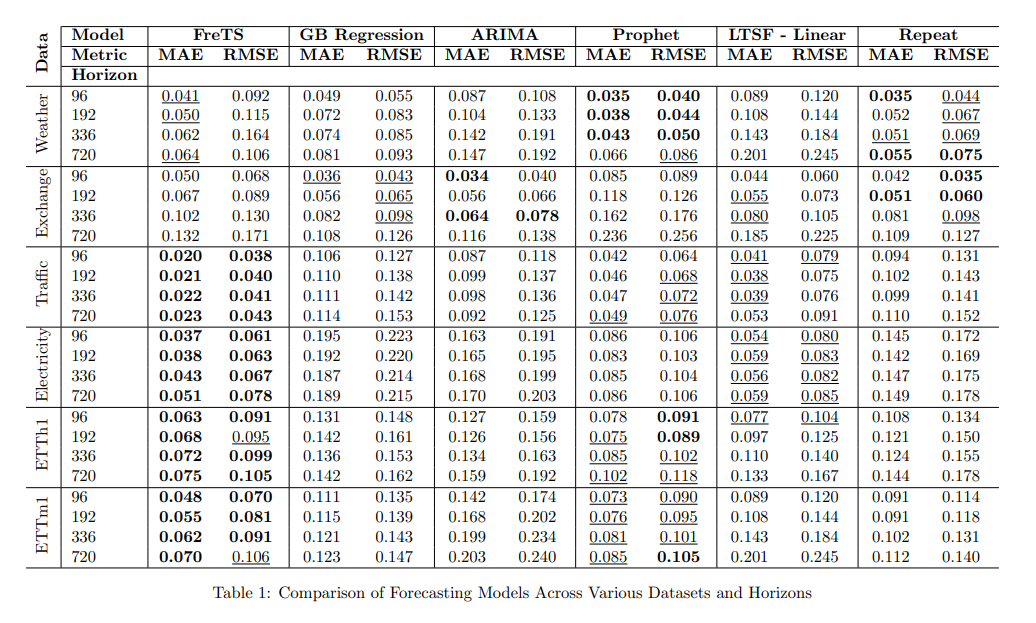

## Qualitative Results

We created the follwoing plots applying different models to the Exchange Rate dataset, with $L=96$ and $\tau = 96$. We were able to also train most of the transformers given the reduced size of the dateset, $L$ and $\tau$.

Plot for exchange 1

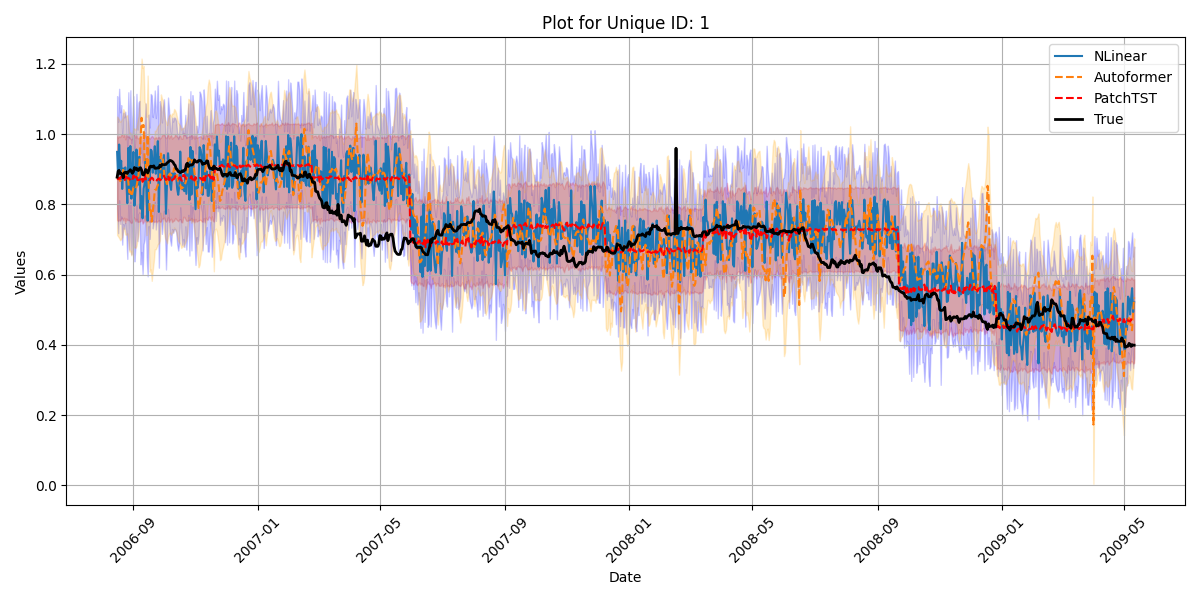

Plot Exchange 2

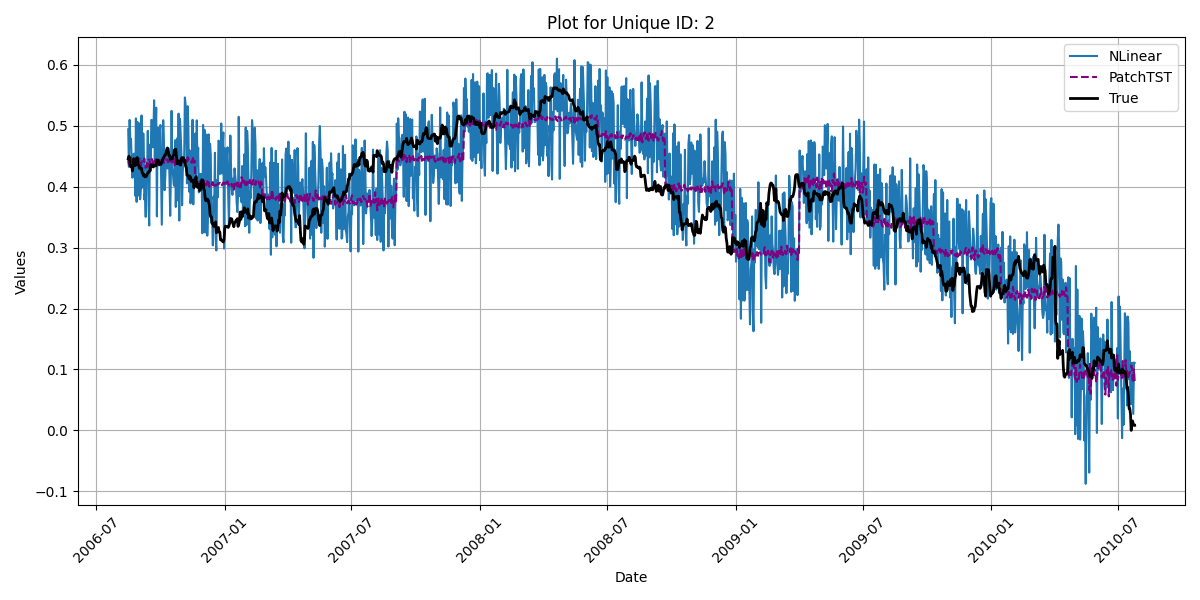

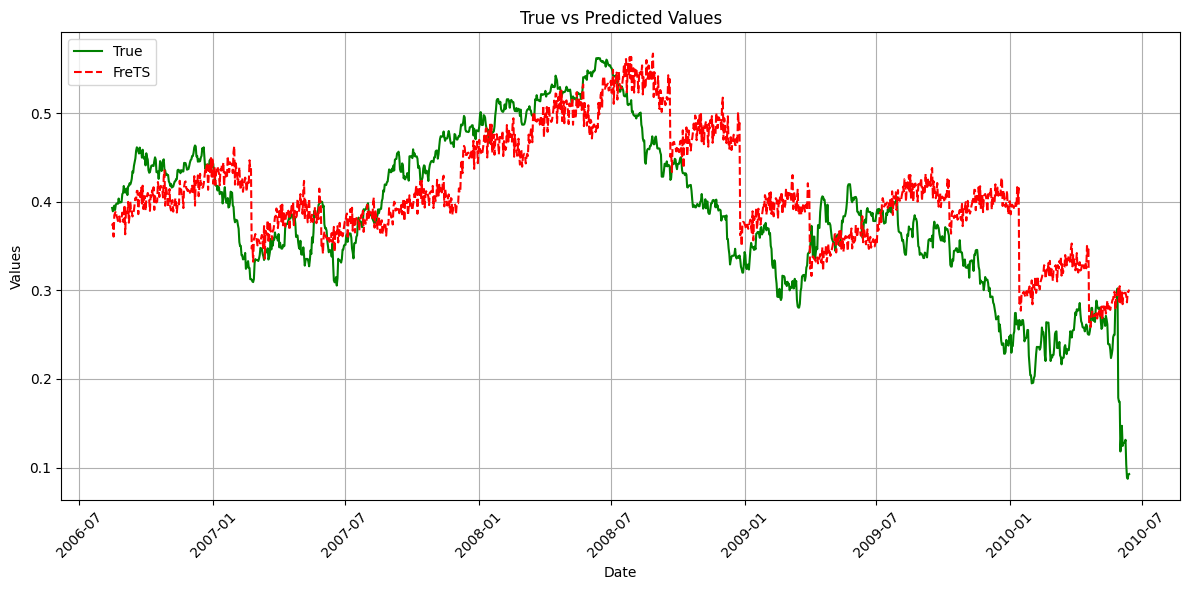

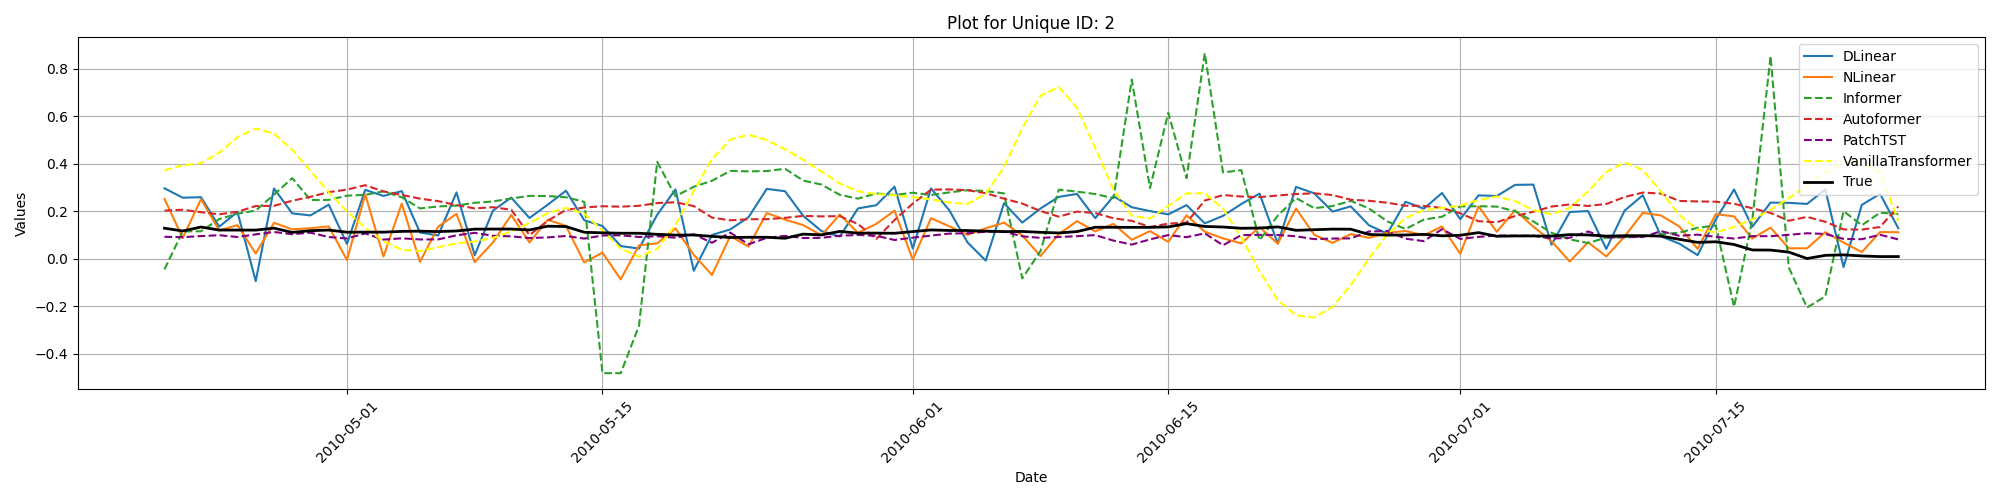

Plot exchange 5

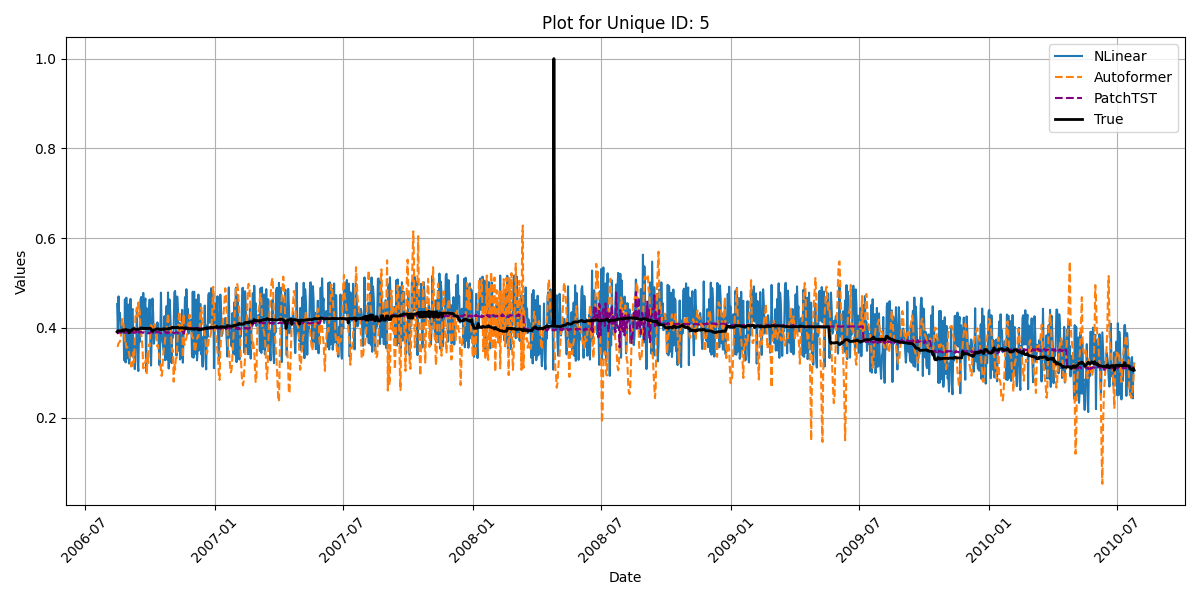

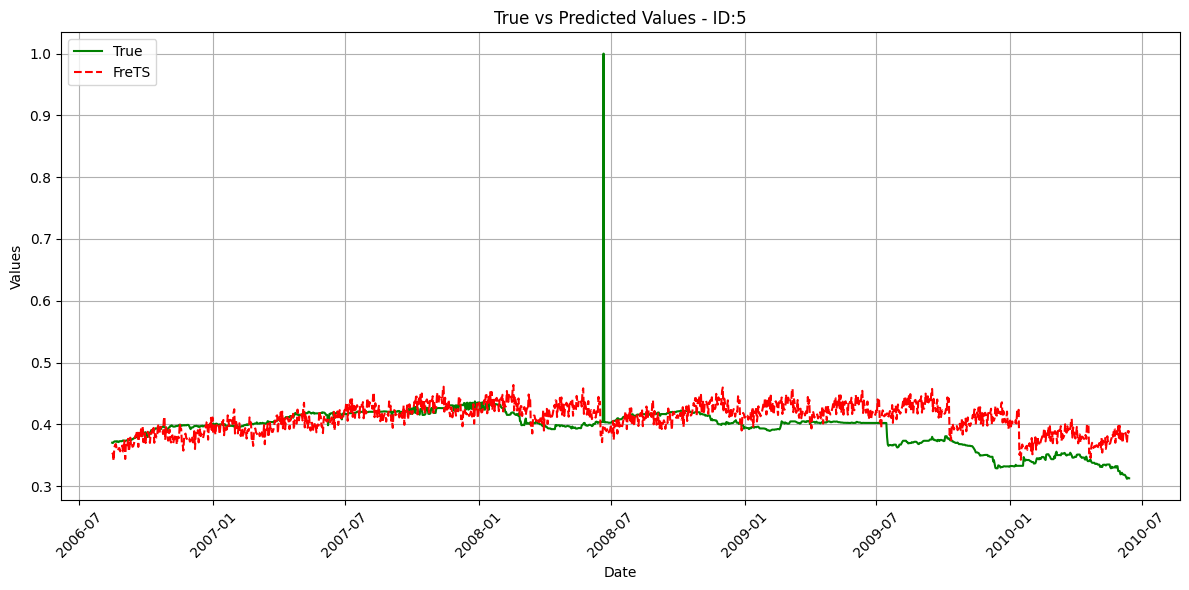

## Conclusions

Our analysis confirms that Transformer architectures do not necessarily bring significant improvements in the field of Time Series forecasting. The increased complexity of these models does not always translate into better performance. 

We found that simpler architectures can often outperform more complex transformer-based models. In particular, Linear Long-Term Time Series Forecasting (LTSF-Linear, DLinear and NLinear) models and MLP models operating in the frequency domain showed better results. In addition, these models are way less complex than transformers, while showing better efficiency and performance in all the dataseet that we have tested.   

If we look at our implementation, very simple and basic models such as Gradient Boosting Regression, ARIMA and our baseline (repeating the lookback window) showed poor results compared to transformers’. On the other hand, our Prophet implementation was able to keep up to FreTS and LTSF - Linear results’, thus often beating Transformers

In conclusion, if we admit a higher computational cost (compared to linear models) then we will definitelty choose the MLP in frequency model to do time series prediction on long time horizons.
